Links:
---
**Face recognition dataset:**
* https://lionbridge.ai/datasets/5-million-faces-top-15-free-image-datasets-for-facial-recognition/
* https://www.kaggle.com/frules11/pins-face-recognition

**Tutorials:**
* https://www.tensorflow.org/tutorials/images/transfer_learning_with_hub
* 

**Dataset:**
Since we are using google colab we have to download dataset every time we run this notebook.

In [5]:
!wget https://i.guim.co.uk/img/media/fe1e34da640c5c56ed16f76ce6f994fa9343d09d/0_174_3408_2046/master/3408.jpg?width=1920&quality=85&auto=format&fit=max&s=4932922b42cc60f4bc77ae9d5382ea49

--2019-11-19 09:12:15--  https://i.guim.co.uk/img/media/fe1e34da640c5c56ed16f76ce6f994fa9343d09d/0_174_3408_2046/master/3408.jpg?width=1920
Resolving i.guim.co.uk (i.guim.co.uk)... 151.101.1.111, 151.101.65.111, 151.101.129.111, ...
Connecting to i.guim.co.uk (i.guim.co.uk)|151.101.1.111|:443... connected.
HTTP request sent, awaiting response... 401 Unauthorized - missing signature

Username/Password Authentication Failed.


In [4]:
!wget https://www.google.com/url?sa=i&source=images&cd=&ved=2ahUKEwjT7ufr9vXlAhVjyDgGHdupBEkQjRx6BAgBEAQ&url=https%3A%2F%2Fwww.petfinder.com%2Fdog-breeds%2F&psig=AOvVaw33EZLGwqAvcQOgdTFONkEq&ust=1574240899777776

--2019-11-19 09:10:29--  https://www.google.com/url?sa=i
Resolving www.google.com (www.google.com)... 172.217.212.106, 172.217.212.104, 172.217.212.147, ...
Connecting to www.google.com (www.google.com)|172.217.212.106|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘url?sa=i’

url?sa=i                [ <=>                ]   1.36K  --.-KB/s    in 0s      

2019-11-19 09:10:29 (21.8 MB/s) - ‘url?sa=i’ saved [1395]



In [0]:
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/78.0.3904.97 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-data-sets/158362/362891/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1574234528&Signature=eJ0exD81yVo7EFn0DeVhDTfAgbhh4QtzdKx%2B4l8r79xaE5e3HL7WR6dgeAU6k4bvpjSNRCrFYmDwdPF%2B1Qs50h9CBzKRpcCFcofRF8Pd%2BY8ekBKiAKlXST%2FdjzUKgfU1U546zOn1IAVpwEmwCAsBR7zH%2FeuWyMK31e5xRX43X2sY3Cax3gkfaHtcNmg3G81hz3o6NYET%2FVB%2BNVRTQfjL%2F7aliV%2B1bRHFr9Zh3T5eoCTLTpOpMkcKb0vRV1fJf5zXGUf02WRzWqyX2%2FRiKVWr5jY671bXNUWbsO2lSZzPg3Sql7%2FEegRC%2F0xV5CCd9gJ1xo93arHvxaaci8zvZ8dv7Q%3D%3D&response-content-disposition=attachment%3B+filename%3Dpins-face-recognition.zip" -O "pins-face-recognition.zip" -c

In [0]:
!unzip -q pins-face-recognition.zip

**Data Preparation:**
* Read images from the disk
* Decode contents of these images and convert it into proper grid format as per their RGB content.
* Convert them into floating point tensors.
* Rescale the tensors from values between 0 and 255 to values between 0 and 1, as neural networks prefer to deal with small input values.

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import matplotlib.pylab as plt

try:
  # %tensorflow_version only exists in Colab.
  !pip install tf-nightly
except Exception:
  pass
import tensorflow as tf

In [2]:
!pip install -U tf-hub-nightly
import tensorflow_hub as hub

from tensorflow.keras import layers

Requirement already up-to-date: tf-hub-nightly in /usr/local/lib/python3.6/dist-packages (0.8.0.dev201911150007)


In [0]:
classifier_url ="https://tfhub.dev/google/imagenet/resnet_v1_101/classification/4" #@param {type:"string"}

In [0]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer(classifier_url, input_shape=IMAGE_SHAPE+(3,))
])

In [0]:
data_root = '/content/pins/PINS/'

In [15]:
len(os.listdir('/content/pins/PINS/pins_rihanna'))

120

In [6]:
import os
len(os.listdir('/content/pins/PINS'))

100

In [34]:
 !ls /content/pins/PINS

'pins_Aaron Paul'		 'pins_Josh Radnor'
'pins_alexandra daddario'	 'pins_kiernan shipka '
'pins_Alvaro Morte'		 'pins_Kit Harington'
'pins_alycia debnam carey face'  'pins_kristen stewart face'
'pins_Amanda Crew'		 'pins_Krysten Ritter'
'pins_Amaury Nolasco'		 'pins_Kumail Nanjiani'
'pins_amber heard face'		 'pins_lindsey morgan face'
'pins_Anna Gunn'		 'pins_Maisie Williams'
'pins_anne hathaway'		 'pins_margot robbie face'
'pins_barbara palvin face'	 'pins_maria pedraza'
'pins_bellamy blake face'	 'pins_Mark Ruffalo'
'pins_Benedict Cumberbatch'	 'pins_mark zuckerberg'
'pins_Betsy Brandt'		 'pins_Martin Starr'
'pins_bill gates'		 'pins_Melissa benoit'
'pins_Brenton Thwaites'		 'pins_miguel herran'
'pins_brie larson'		 'pins_Mike Colter'
'pins_Brit Marling'		 'pins_millie bobby brown'
'pins_Bryan Cranston'		 'pins_Morena Baccarin'
'pins_Caity Lotz'		 'pins_Morgan Freeman'
'pins_Cameron Monaghan'		 'pins_Natalie Portman '
'pins_chadwick boseman face'	 'pins_Neil Patrick Harris'
'pins_Chan

In [42]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
image_data = image_generator.flow_from_directory(str(data_root), target_size=IMAGE_SHAPE)

Found 10770 images belonging to 100 classes.


In [43]:
for image_batch, label_batch in image_data:
  print("Image batch shape: ", image_batch.shape)
  print("Label batch shape: ", label_batch.shape)
  break

Image batch shape:  (32, 224, 224, 3)
Label batch shape:  (32, 100)


In [44]:
result_batch = classifier.predict(image_batch)
result_batch.shape

(32, 1001)

In [45]:
result_batch[0].shape

(1001,)

In [0]:
import numpy as np
from PIL import Image

labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

In [57]:
!ls

pins  PINS  pins-face-recognition.zip  sample_data


In [47]:
predicted_class_names = imagenet_labels[np.argmax(result_batch, axis=-1)]
predicted_class_names

array(['fur coat', 'envelope', 'mortarboard', 'home theater', 'sunglass',
       'television', 'academic gown', 'barbershop', 'academic gown',
       'mortarboard', 'television', 'neck brace', 'wig', 'brassiere',
       'academic gown', 'neck brace', 'home theater', 'television',
       'abaya', 'television', 'book jacket', 'abaya', 'home theater',
       'brassiere', 'mortarboard', 'television', 'home theater', 'bikini',
       'cellular telephone', 'abaya', 'academic gown', 'cowboy hat'],
      dtype='<U30')

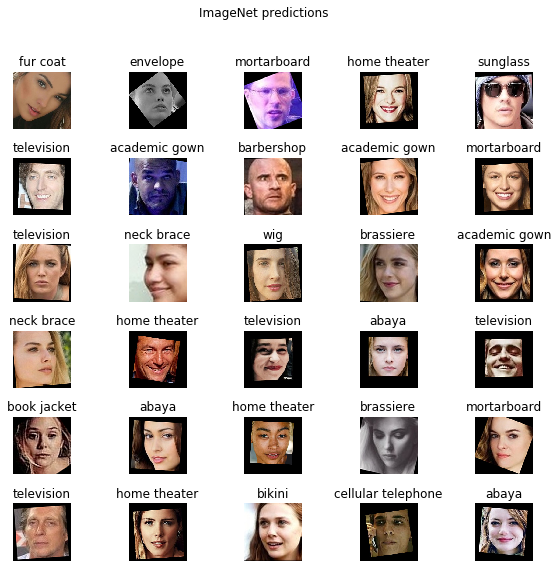

In [48]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(image_batch[n])
  plt.title(predicted_class_names[n])
  plt.axis('off')
_ = plt.suptitle("ImageNet predictions")

In [0]:
feature_extractor_url = "https://tfhub.dev/google/imagenet/resnet_v1_101/feature_vector/4" #@param {type:"string"}

In [0]:
feature_extractor_layer = hub.KerasLayer(feature_extractor_url,
                                         input_shape=(224,224,3))

In [52]:
feature_batch = feature_extractor_layer(image_batch)
print(feature_batch.shape)

(32, 2048)


In [0]:
feature_extractor_layer.trainable = False

In [54]:
model = tf.keras.Sequential([
  feature_extractor_layer,
  layers.Dense(image_data.num_classes, activation='softmax')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_3 (KerasLayer)   (None, 2048)              42605504  
_________________________________________________________________
dense_1 (Dense)              (None, 100)               204900    
Total params: 42,810,404
Trainable params: 204,900
Non-trainable params: 42,605,504
_________________________________________________________________


In [0]:
predictions = model(image_batch)

In [58]:
predictions.shape

TensorShape([32, 100])

In [0]:
model.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss='categorical_crossentropy',
  metrics=['acc'])

In [0]:
class CollectBatchStats(tf.keras.callbacks.Callback):
  def __init__(self):
    self.batch_losses = []
    self.batch_acc = []

  def on_train_batch_end(self, batch, logs=None):
    self.batch_losses.append(logs['loss'])
    self.batch_acc.append(logs['acc'])
    self.model.reset_metrics()

In [0]:
steps_per_epoch = np.ceil(image_data.samples/image_data.batch_size)

batch_stats_callback = CollectBatchStats()

history = model.fit_generator(image_data, epochs=2,
                              steps_per_epoch=steps_per_epoch,
                              callbacks = [batch_stats_callback])

  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 337.0 steps
Epoch 1/2
255/337 [=====================>........] - ETA: 11:08 - loss: 3.7962 - acc: 0.1875

In [0]:
plt.figure()
plt.ylabel("Loss")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(batch_stats_callback.batch_losses)

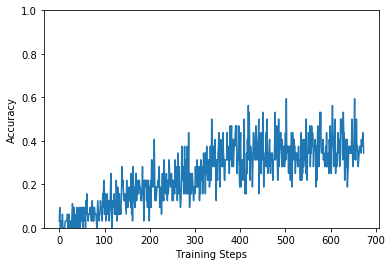

In [30]:
plt.figure()
plt.ylabel("Accuracy")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(batch_stats_callback.batch_acc)

In [31]:
class_names = sorted(image_data.class_indices.items(), key=lambda pair:pair[1])
class_names = np.array([key.title() for key, value in class_names])
class_names

array(['Pins_Aaron Paul', 'Pins_Alvaro Morte', 'Pins_Amanda Crew',
       'Pins_Amaury Nolasco', 'Pins_Anna Gunn',
       'Pins_Benedict Cumberbatch', 'Pins_Betsy Brandt',
       'Pins_Brenton Thwaites', 'Pins_Brit Marling',
       'Pins_Bryan Cranston', 'Pins_Caity Lotz', 'Pins_Cameron Monaghan',
       'Pins_Chance Perdomo', 'Pins_Chris Evans', 'Pins_Chris Pratt',
       'Pins_Cobie Smulders', 'Pins_Danielle Panabaker',
       'Pins_Dave Franco', 'Pins_Dominic Purcell', 'Pins_Dwayne Johnson',
       'Pins_Emilia Clarke', 'Pins_Emily Bett Rickards',
       'Pins_Emma Stone', 'Pins_Gwyneth Paltrow', 'Pins_Henry Cavil',
       'Pins_Jason Momoa', 'Pins_Jeremy Renner', 'Pins_Jesse Eisenberg',
       'Pins_Jim Parsons', 'Pins_Jon Bernthal', 'Pins_Josh Radnor',
       'Pins_Kit Harington', 'Pins_Krysten Ritter',
       'Pins_Kumail Nanjiani', 'Pins_Maisie Williams',
       'Pins_Mark Ruffalo', 'Pins_Martin Starr', 'Pins_Melissa Benoit',
       'Pins_Mike Colter', 'Pins_Morena Baccarin', 'P

In [0]:
predicted_batch = model.predict(image_batch)
predicted_id = np.argmax(predicted_batch, axis=-1)
predicted_label_batch = class_names[predicted_id]

In [0]:
label_id = np.argmax(label_batch, axis=-1)

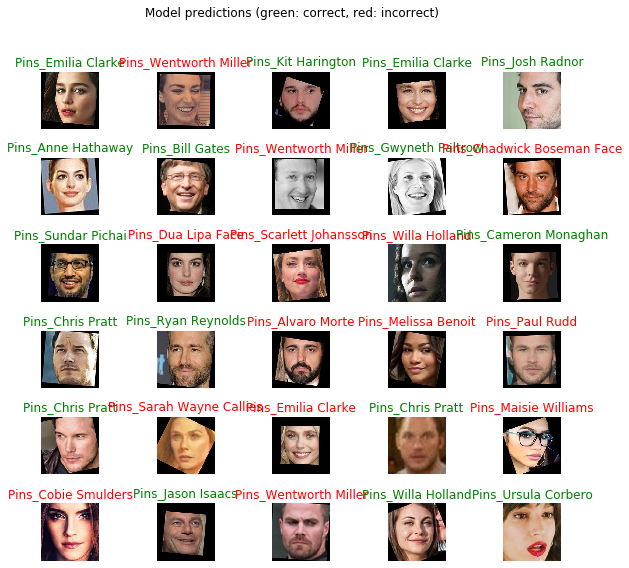

In [35]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(image_batch[n])
  color = "green" if predicted_id[n] == label_id[n] else "red"
  plt.title(predicted_label_batch[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect)")

In [36]:
import time
t = time.time()

export_path = "/tmp/saved_models/{}".format(int(t))
model.save(export_path, save_format='tf')

export_path

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.


INFO:tensorflow:Assets written to: /tmp/saved_models/1574151342/assets


INFO:tensorflow:Assets written to: /tmp/saved_models/1574151342/assets


'/tmp/saved_models/1574151342'

In [0]:
reloaded = tf.keras.models.load_model(export_path)

In [0]:
result_batch = model.predict(image_batch)
reloaded_result_batch = reloaded.predict(image_batch)

In [0]:
abs(reloaded_result_batch - result_batch).max()

? ERROR:
===

In [0]:
#%cd pins/PINS
!ls pins/PINS

In [0]:
#%cd /pins/PINS
!tar -cvzf face_classification.tar.gz /content/pins/PINS/*/*.jpg

In [0]:
!tar -cvzf face_classification.tar.gz /content/

In [0]:
!rm face_classification.tar.gz

In [0]:
%cd /content/
!ls

In [0]:
!ls pins/PINS

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [0]:
import tensorflow as tf

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [0]:
PATH = os.path.join('/content/', 'pins/PINS')
os.listdir(PATH)

In [0]:
!ls pins/PINS/pins_zendaya

In [0]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('pins/PINS/pins_zendaya/zendaya0.jpg')
plt.imshow(img)

In [0]:
from __future__ import absolute_import, division, print_function, unicode_literals

import matplotlib.pylab as plt

try:
  # %tensorflow_version only exists in Colab.
  !pip install tf-nightly
except Exception:
  pass
import tensorflow as tf

In [0]:
import numpy as np
import PIL.Image as Image

grace_hopper = tf.keras.utils.get_file('image.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/grace_hopper.jpg')
grace_hopper = Image.open(grace_hopper).resize(IMAGE_SHAPE)
grace_hopper

In [0]:
grace_hopper = np.array(grace_hopper)/255.0
grace_hopper.shape

In [0]:
result = classifier.predict(grace_hopper[np.newaxis, ...])
result.shape

In [0]:
predicted_class = np.argmax(result[0], axis=-1)
predicted_class

In [0]:
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

In [0]:
plt.imshow(grace_hopper)
plt.axis('off')
predicted_class_name = imagenet_labels[predicted_class]
_ = plt.title("Prediction: " + predicted_class_name.title())

In [0]:
data_root = tf.keras.utils.get_file(
  'flower_photos','https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
   untar=True)

In [0]:
!wget https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz
!tar -xzf flower_photos.tgz

In [0]:
!ls flower_photos/roses

In [0]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
image_data = image_generator.flow_from_directory(str(data_root), target_size=IMAGE_SHAPE)

In [0]:
for image_batch, label_batch in image_data:
  print("Image batch shape: ", image_batch.shape)
  print("Label batch shape: ", label_batch.shape)
  break

In [0]:
result_batch = classifier.predict(image_batch)
result_batch.shape

In [0]:
predicted_class_names = imagenet_labels[np.argmax(result_batch, axis=-1)]
predicted_class_names

In [0]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(image_batch[n])
  plt.title(predicted_class_names[n])
  plt.axis('off')
_ = plt.suptitle("ImageNet predictions")

In [0]:
class_names = sorted(image_data.class_indices.items(), key=lambda pair:pair[1])
class_names = np.array([key.title() for key, value in class_names])
class_names

In [0]:
predicted_batch = model.predict(image_batch)
predicted_id = np.argmax(predicted_batch, axis=-1)
predicted_label_batch = class_names[predicted_id]

In [0]:
label_id = np.argmax(label_batch, axis=-1)

In [0]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(image_batch[n])
  color = "green" if predicted_id[n] == label_id[n] else "red"
  plt.title(predicted_label_batch[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect)")

In [0]:
batch_size = 32
epochs = 1
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [0]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'pins/PINS')

Part I: Preparation
---
How to load the dataset i.e., downloading the first time you run it, preprocessing it and iterating through it in minibatches.

In [0]:
#petfinder-adoption-prediction-challenge-dataset
"""
    a common example of data available in real-life
"""
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/72.0.3626.121 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle/10686/238170/train_images.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1553081186&Signature=CggXfNCuGHwvF%2BcY8iYo2nnu15mFvt9PvVlRwMQU3XcJVxpt3JECxAIqA71S3j4vS0giJRMLUySfm6lBca9oIOxfkiOYSS7aXJIseGjEsUEySS2dgBkzi6TjRV2rKG0MJL8Xq4x3nlPztY%2F%2B%2FyreiMXzry6staT3wazT1u%2B6b992DxnFgt6fIwHngCPwoRKVHmOJDvPLgTs5mdCgj5L0PbwSYmXznh%2F6GODXS1uJYF%2BvaFjJWrGv%2BcsARUY9J%2BnBJPtpIgt1c%2FFGs20a6DPjuZA3AAvtb28VfFMVYcQvg06GdcBHYESlMXLZgeiNrQoMpkqbsLMAnRIajTXFZvUCSw%3D%3D" -O "train_images.zip" -c
!mkdir data
!unzip -qq train_images.zip -d data/train_images
N, D_in, H, D_out = 64, 1000, 100, 10
y = torch.randn(N, D_out, device=device) #generate some random labels 

In [0]:
import os
import tensorflow as tf
import numpy as np
import math
import timeit
import matplotlib.pyplot as plt

%matplotlib inline

In [0]:
def load_cifar10(num_training=49000, num_validation=1000, num_test=10000):
    """
    Fetch the CIFAR-10 dataset from the web and perform preprocessing to prepare
    it for the two-layer neural net classifier. These are the same steps as
    we used for the SVM, but condensed to a single function.
    """
    # Load the raw CIFAR-10 dataset and use appropriate data types and shapes
    cifar10 = tf.keras.datasets.cifar10.load_data()
    (X_train, y_train), (X_test, y_test) = cifar10
    X_train = np.asarray(X_train, dtype=np.float32)
    y_train = np.asarray(y_train, dtype=np.int32).flatten()
    X_test = np.asarray(X_test, dtype=np.float32)
    y_test = np.asarray(y_test, dtype=np.int32).flatten()

    # Subsample the data
    mask = range(num_training, num_training + num_validation)
    X_val = X_train[mask]
    y_val = y_train[mask]
    mask = range(num_training)
    X_train = X_train[mask]
    y_train = y_train[mask]
    mask = range(num_test)
    X_test = X_test[mask]
    y_test = y_test[mask]

    # Normalize the data: subtract the mean pixel and divide by std
    mean_pixel = X_train.mean(axis=(0, 1, 2), keepdims=True)
    std_pixel = X_train.std(axis=(0, 1, 2), keepdims=True)
    X_train = (X_train - mean_pixel) / std_pixel
    X_val = (X_val - mean_pixel) / std_pixel
    X_test = (X_test - mean_pixel) / std_pixel

    return X_train, y_train, X_val, y_val, X_test, y_test


# Invoke the above function to get our data.
NHW = (0, 1, 2)
X_train, y_train, X_val, y_val, X_test, y_test = load_cifar10()
print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape, y_train.dtype)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

In [0]:
class Dataset(object):
  def __init__(self, X, y, batch_size, shuffle=False):
    """
    Construct a Dataset object to iterate over data X and labels y
    
    Inputs:
    - X: Numpy array of data, of any shape
    - y: Numpy array of labels, of any shape but with y.shape[0] == X.shape[0]
    - batch_size: Integer giving number of elements per minibatch
    - shuffle: (optional) Boolean, whether to shuffle the data on each epoch
    """
    
    assert X.shape[0] == y.shape[0], 'Got different numbers of data and labels'
    self.X, self.y = X, y
    self.batch_size, self.shuffle = batch_size, shuffle
    
  def __iter__(self):
    N, B = self.X.shape[0], self.batch_size
    idxs = np.arange(N)
    if self.shuffle:
      np.random.shuffle(idxs)
    return iter((self.X[i:i+B], self.y[i:i+B]) for i in range(0, N, B))

In [0]:
train_dset = Dataset(X_train, y_train, batch_size=64, shuffle=True)
val_dset = Dataset(X_val, y_val, batch_size=64, shuffle=False)
test_dset = Dataset(X_test, y_test, batch_size=64)

In [0]:
#to iterate through dataset:
for t, (x, y) in enumerate(train_dset):
  print(t, x.shape, y.shape)
  if t > 5: break

In [0]:
import os
import pprint
import tensorflow as tf

if 'COLAB_TPU_ADDR' not in os.environ:
  print('ERROR: Not connected to a TPU runtime; please see the first cell in this notebook for instructions!')
else:
  tpu_address = 'grpc://' + os.environ['COLAB_TPU_ADDR']
  print ('TPU address is', tpu_address)

  with tf.Session(tpu_address) as session:
    devices = session.list_devices()
    
  print('TPU devices:')
  pprint.pprint(devices)

In [0]:
USE_TPU = True

if USE_TPU:
  device = '/device:TPU:1'
else:
  device = '/cpu:0'
  
  
print_every = 100

print('Using device:', device)

In [0]:

# Set up some global variables
USE_GPU = False

if USE_GPU:
    device = '/device:GPU:0'
else:
    device = '/cpu:0'

# Constant to control how often we print when training models
print_every = 100

print('Using device: ', device)

Part II: Barebone
---
using various high-level APIs which make it very convenient to define and train neural networks

In [0]:
def flatten(x):
    """    
    Input:
    - TensorFlow Tensor of shape (N, D1, ..., DM)
    
    Output:
    - TensorFlow Tensor of shape (N, D1 * ... * DM)
    """
    N = tf.shape(x)[0]
    return tf.reshape(x, (N, -1))

In [0]:
def test_flatten():
    # Clear the current TensorFlow graph.
    tf.reset_default_graph()
    
    # Stage I: Define the TensorFlow graph describing our computation.
    # In this case the computation is trivial: we just want to flatten
    # a Tensor using the flatten function defined above.
    
    # Our computation will have a single input, x. We don't know its
    # value yet, so we define a placeholder which will hold the value
    # when the graph is run. We then pass this placeholder Tensor to
    # the flatten function; this gives us a new Tensor which will hold
    # a flattened view of x when the graph is run. The tf.device
    # context manager tells TensorFlow whether to place these Tensors
    # on CPU or GPU.
    with tf.device(device):
        x = tf.placeholder(tf.float32)
        x_flat = flatten(x)
    
    # At this point we have just built the graph describing our computation,
    # but we haven't actually computed anything yet. If we print x and x_flat
    # we see that they don't hold any data; they are just TensorFlow Tensors
    # representing values that will be computed when the graph is run.
    print('x: ', type(x), x)
    print('x_flat: ', type(x_flat), x_flat)
    print()
    
    # We need to use a TensorFlow Session object to actually run the graph.
    with tf.Session() as sess:
        # Construct concrete values of the input data x using numpy
        x_np = np.arange(24).reshape((2, 3, 4))
        print('x_np:\n', x_np, '\n')
    
        # Run our computational graph to compute a concrete output value.
        # The first argument to sess.run tells TensorFlow which Tensor
        # we want it to compute the value of; the feed_dict specifies
        # values to plug into all placeholder nodes in the graph. The
        # resulting value of x_flat is returned from sess.run as a
        # numpy array.
        x_flat_np = sess.run(x_flat, feed_dict={x: x_np})
        print('x_flat_np:\n', x_flat_np, '\n')

        # We can reuse the same graph to perform the same computation
        # with different input data
        x_np = np.arange(12).reshape((2, 3, 2))
        print('x_np:\n', x_np, '\n')
        x_flat_np = sess.run(x_flat, feed_dict={x: x_np})
        print('x_flat_np:\n', x_flat_np)
test_flatten()

In [0]:
def two_layer_fc(x, params):
    """
    A fully-connected neural network; the architecture is:
    fully-connected layer -> ReLU -> fully connected layer.
    Note that we only need to define the forward pass here; TensorFlow will take
    care of computing the gradients for us.
    
    The input to the network will be a minibatch of data, of shape
    (N, d1, ..., dM) where d1 * ... * dM = D. The hidden layer will have H units,
    and the output layer will produce scores for C classes.

    Inputs:
    - x: A TensorFlow Tensor of shape (N, d1, ..., dM) giving a minibatch of
      input data.
    - params: A list [w1, w2] of TensorFlow Tensors giving weights for the
      network, where w1 has shape (D, H) and w2 has shape (H, C).
    
    Returns:
    - scores: A TensorFlow Tensor of shape (N, C) giving classification scores
      for the input data x.
    """
    w1, w2 = params  # Unpack the parameters
    x = flatten(x)   # Flatten the input; now x has shape (N, D)
    h = tf.nn.relu(tf.matmul(x, w1)) # Hidden layer: h has shape (N, H)
    scores = tf.matmul(h, w2)        # Compute scores of shape (N, C)
    return scores

In [0]:
def two_layer_fc_test():
    # TensorFlow's default computational graph is essentially a hidden global
    # variable. To avoid adding to this default graph when you rerun this cell,
    # we clear the default graph before constructing the graph we care about.
    tf.reset_default_graph()
    hidden_layer_size = 42

    # Scoping our computational graph setup code under a tf.device context
    # manager lets us tell TensorFlow where we want these Tensors to be
    # placed.
    with tf.device(device):
        # Set up a placehoder for the input of the network, and constant
        # zero Tensors for the network weights. Here we declare w1 and w2
        # using tf.zeros instead of tf.placeholder as we've seen before - this
        # means that the values of w1 and w2 will be stored in the computational
        # graph itself and will persist across multiple runs of the graph; in
        # particular this means that we don't have to pass values for w1 and w2
        # using a feed_dict when we eventually run the graph.
        x = tf.placeholder(tf.float32)
        w1 = tf.zeros((32 * 32 * 3, hidden_layer_size))
        w2 = tf.zeros((hidden_layer_size, 10))
        
        # Call our two_layer_fc function to set up the computational
        # graph for the forward pass of the network.
        scores = two_layer_fc(x, [w1, w2])
    
    # Use numpy to create some concrete data that we will pass to the
    # computational graph for the x placeholder.
    x_np = np.zeros((64, 32, 32, 3))
    with tf.Session() as sess:
        # The calls to tf.zeros above do not actually instantiate the values
        # for w1 and w2; the following line tells TensorFlow to instantiate
        # the values of all Tensors (like w1 and w2) that live in the graph.
        sess.run(tf.global_variables_initializer())
        
        # Here we actually run the graph, using the feed_dict to pass the
        # value to bind to the placeholder for x; we ask TensorFlow to compute
        # the value of the scores Tensor, which it returns as a numpy array.
        scores_np = sess.run(scores, feed_dict={x: x_np})
        print(scores_np.shape)

two_layer_fc_test()

In [0]:
x

In [0]:
x_flat_np

In [0]:

if USE_GPU:
  device = '/device:GPU:0'
else:
  device = '/cpu:0'
  
  
print_every = 100

print('Using device:')

In [0]:
cifar10 = tf.keras.datasets.cifar10.load_data()
(X_train, y_train), (X_test, y_test) = cifar10 

In [0]:
X_train = np.asarray(X_train, dtype=np.float32)
y_train = np.asarray(y_train, dtype=np.int32).flatten()

In [0]:
X_test = np.asarray(X_test, dtype=np.float32)
y_test = np.asarray(y_test, dtype=np.int32).flatten()

In [0]:
num_training = 49000; num_validation=1000; num_test=10000
mask = range(num_training, num_training + num_validation)
X_val = X_train[mask]
y_val = y_train[mask]
mask = range(num_training)
X_train = X_train[mask]
y_train = y_train[mask]
mask = range(num_test)
X_test = X_test[mask]
y_test = y_test[mask]

In [0]:
X_train.shape

In [0]:
mean_pixel = X_train.mean(axis=(0, 1, 2), keepdims=True)
std_pixel = X_train.std(axis=(0, 1, 2), keepdims=True)
X_train = (X_train - mean_pixel) / std_pixel
X_val = (X_val - mean_pixel) / std_pixel
X_test = (X_test - mean_pixel) / std_pixel

In [0]:
N = X_train.shape[0]
idxs = np.arange(N)
np.random.shuffle(idxs)
idxs

In [0]:
train_dset = Dataset(X_train, y_train, batch_size=64, shuffle=True)
val_dset = Dataset(X_avl)

In [0]:
device

In [0]:
a.shape

In [0]:
#CIFAR10
def load_cifar10(num_training=49000, num_validation=1000, num_test=10000):
  """
      Fetch the CIFAR-10 dataset from the web and perform preprocessing to prepare
      it for the two-layer neural net classifier. These are the same steps as 
      we used for the SVM, but condensed to a single function.
  """
  # load the raw CIFAR-10 dataset and use appropriate data types and shapes
  cifar10 = tf.kerasdatasets.cifar10.load_data()
  (X_train , y_train), (X_test, y_test) = cifar10